In [18]:
# taken reference from : https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51


import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("https://raw.githubusercontent.com/1nt18is036/ML_LAB/main/iris.csv")
data.head()
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]

#Applying Standardisation to dataset
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

#finding the transpose of the matrix obtained using .T
#covariance matrix = A'A
features = X_scaled.T
#Using numpy to find Covariance matrix
cov_matrix = np.cov(features)
cov_matrix[:5]




array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [19]:
#eigendecomposition through Numpy, returns a tuple which has 1st element as eigen values and 2nd as eigen vectors
e_val, e_vector = np.linalg.eig(cov_matrix)
e_val[:5]


array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [31]:
e_vector[:5]


array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [35]:
# we had 4 attributes initially, we derived 2 principal components PC1 and PC2 which determine the species

projected_1 = X_scaled.dot(e_vector.T[0])
projected_2 = X_scaled.dot(e_vector.T[1])
res = pd.DataFrame(projected_1, columns=["PC1"])
res["PC2"] = projected_2
res["Y"] = y
res.head()

,PC1,PC2,Y
0,-2.264703,-0.480027,1
1,-2.080961,0.674134,1
2,-2.364229,0.341908,1
3,-2.299384,0.597395,1
4,-2.389842,-0.646835,1


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

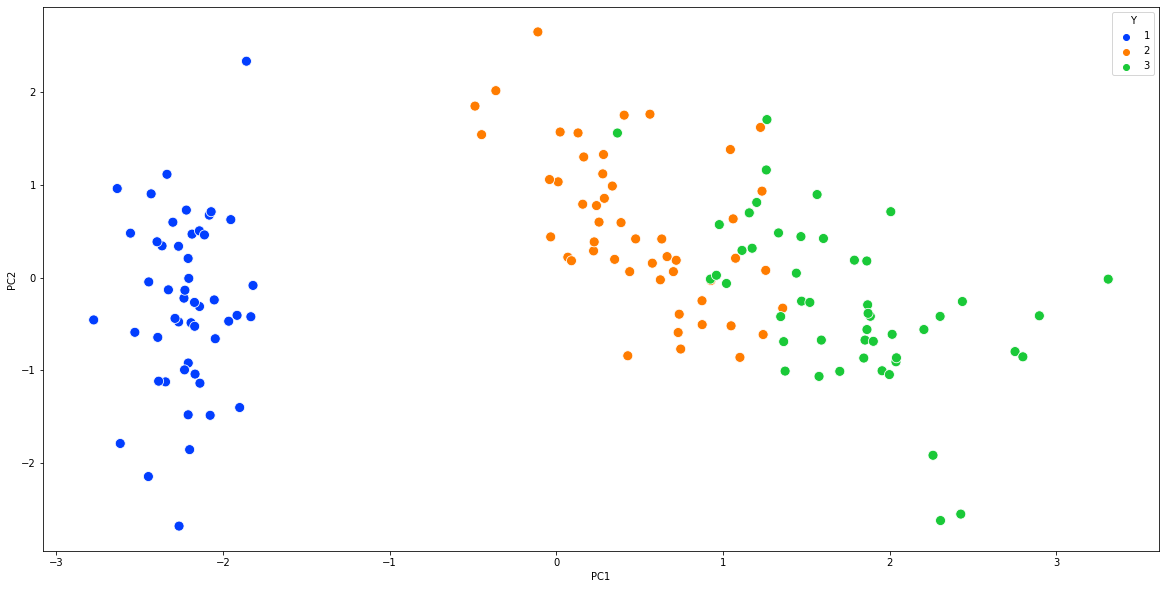

In [48]:
# Representing it in 2D 
plt.figure(figsize=(20, 10))

sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=100,palette="bright")